In [1]:
from sklearn.datasets import load_breast_cancer

#This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
#Data Description
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
from sklearn.preprocessing import StandardScaler

print('\n Features: \n', data.feature_names)
print('\n Labels: ', data.target_names)

#scale features 
Features = StandardScaler().fit_transform(data.data)
Labels = data.target

#check dimensions of numpy arrays
print('Features dim: ', Features.shape)
print('Labels dim: ', Labels.shape)
print('We have {} samples and {} features.'.format(Features.shape[0],Features.shape[1]))


 Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:  ['malignant' 'benign']
Features dim:  (569, 30)
Labels dim:  (569,)
We have 569 samples and 30 features.


Model accuracy is 0.965034965034965 and cross-validation accuracy is 0.9427106227106228
Root mean squared error is 0.05728937728937729


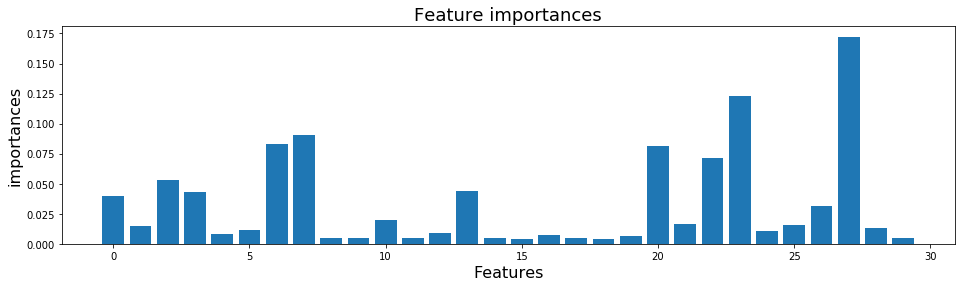

The 2 most important features are: 
23 Feature: worst area, Importance Value: 0.12319231862960989
27 Feature: worst concave points, Importance Value: 0.17229520871965895


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline    
import numpy as np

#Perform a Random Forest classification
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

R2_score = model.score(X_test, y_test)
cv_score = cross_val_score(model, X_test, y_test, cv=10, scoring = 'accuracy').mean()
rmse = -cross_val_score(model, X_test, y_test, cv=10,scoring='neg_mean_squared_error').mean()

print("Model accuracy is {} and cross-validation accuracy is {}".format(R2_score, cv_score))
print("Root mean squared error is {}".format(rmse))

#Plot feature importances using a bar plot for visualisation
plt.figure(figsize = [16,4])
n = Features.shape[1]
importances = model.feature_importances_
plt.bar(np.arange(n),model.feature_importances_)
plt.title('Feature importances', fontsize = 18)
plt.xlabel('Features', fontsize = 16)
plt.ylabel('importances', fontsize = 16)
plt.show()

#Extract and display the two most important features
# Indices of features with importances larger than a threshold
ind = np.where(importances>0.11)[0]
print('The {} most important features are: ' .format(ind.size))

# Print the names of the selected structures and importance values
for i in range(ind.size):
    print('{} Feature: {}, Importance Value: {}'.format(ind[i], data.feature_names[ind[i]],importances[ind[i]]))

# Extract features
Features_selected = np.zeros((Features.shape[0],2))
Features_selected[:,0] = Features[:,ind[0]]
Features_selected[:,1] = Features[:,ind[1]]

Size of original features:  (569, 30)
Size of new features:  (569, 2)


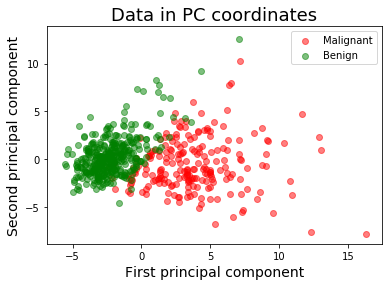

In [5]:
from sklearn.decomposition import PCA

# Visualize the structure of the data

# create PCA model with 2 components
pca = PCA(n_components=2)

# fit data
pca.fit(Features)

# transform the original feature vector to the reduced feature vector
newFeatures = pca.transform(Features)

# check the size of the newFeatures
print('Size of original features: ', Features.shape)
print('Size of new features: ', newFeatures.shape)

# plot the reduced data
plt.scatter(newFeatures[Labels==0,0],newFeatures[Labels==0,1],alpha=0.5,c='Red', label = 'Malignant')
plt.scatter(newFeatures[Labels==1,0],newFeatures[Labels==1,1],alpha=0.5,c='Green', label = 'Benign')
plt.title('Data in PC coordinates', fontsize = 18)
plt.xlabel('First principal component', fontsize = 14)
plt.ylabel('Second principal component', fontsize = 14)
plt.legend()
plt.show()

In [6]:
#Perform a random forest classification on reduced features
X_train_new, X_test_new, y_train, y_test = train_test_split(newFeatures, Labels, random_state=42)

model_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_new.fit(X_train_new,y_train)

R2_score = model_new.score(X_test_new, y_test)
cv_score = cross_val_score(model_new, X_test_new, y_test, cv=10, scoring = 'accuracy').mean()
rmse = -cross_val_score(model_new, X_test_new, y_test, cv=10,scoring='neg_mean_squared_error').mean()

print("Model accuracy is {} and cross-validation accuracy is {}".format(R2_score, cv_score))
print("Root mean squared error is {}".format(rmse))


Model accuracy is 0.965034965034965 and cross-validation accuracy is 0.9437362637362637
Root mean squared error is 0.056263736263736264


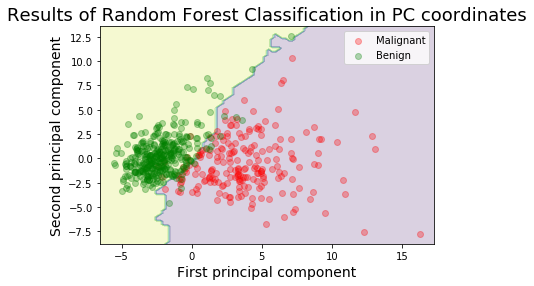

In [7]:
# Visualize results of Random Forest Classification

# create meshgrid for reduced feature range
f1 = np.linspace(newFeatures[:, 0].min()-1, newFeatures[:, 0].max()+1, num = 100)
f2 = np.linspace(newFeatures[:, 1].min()-1, newFeatures[:, 1].max()+1, num = 100)
xx,yy = np.meshgrid(f1, f2)
grid = np.stack([xx.flatten(),yy.flatten()]).T

# feed coordinates to capture prediction from model for the reduced feature range
Z = model.predict(pca.inverse_transform(grid))
# plot classification result
plt.contourf(xx, yy, Z.reshape(xx.shape), alpha =0.2)

# plot reduced data with labels highlighted
plt.scatter(newFeatures[Labels==0,0],newFeatures[Labels==0,1],alpha=0.3,c='Red', label = 'Malignant')
plt.scatter(newFeatures[Labels==1,0],newFeatures[Labels==1,1],alpha=0.3,c='Green', label = 'Benign')

plt.title('Results of Random Forest Classification in PC coordinates', fontsize = 18)
plt.xlabel('First principal component', fontsize = 14)
plt.ylabel('Second principal component', fontsize = 14)
plt.legend()
plt.show()